In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
pd.set_option("max.columns",999)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the data file
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# checking for any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# check the classes for imabalnced data
fraudulent=df["Class"].value_counts(0)[1]
non_fraudulent=df["Class"].value_counts(0)[0]
print("No of fraudulent cases: " , fraudulent)
print("No of non_fraudulent cases: ", non_fraudulent)
print("fraction of fradulent cases over non_fraduelent cases: ",fraudulent/non_fraudulent)

No of fraudulent cases:  492
No of non_fraudulent cases:  284315
fraction of fradulent cases over non_fraduelent cases:  0.0017304750013189597


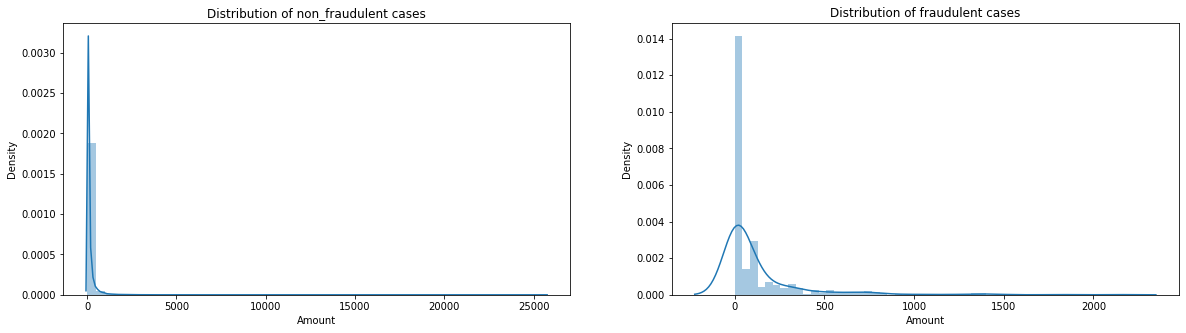

In [5]:
# non_fradulent cases are distrubted over wide range and fradulent cases are concentrated from range 0 to 500.
# this will be a good paramater for our predictions

fig,ax=plt.subplots(1,2,figsize=(20,5))
sns.distplot(df[df["Class"]==0]["Amount"],ax=ax[0])
ax[0].set_title("Distribution of non_fraudulent cases")
sns.distplot(df[df["Class"]==1]["Amount"],ax=ax[1])
ax[1].set_title("Distribution of fraudulent cases");

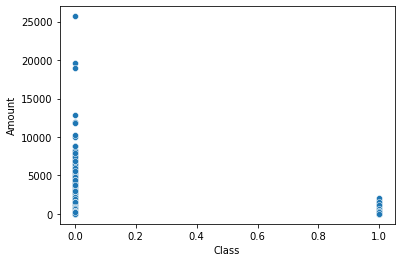

In [6]:
# scatter plot to see the distribution of amount even clearly
sns.scatterplot(x=df['Class'],y=df['Amount'])
plt.show()

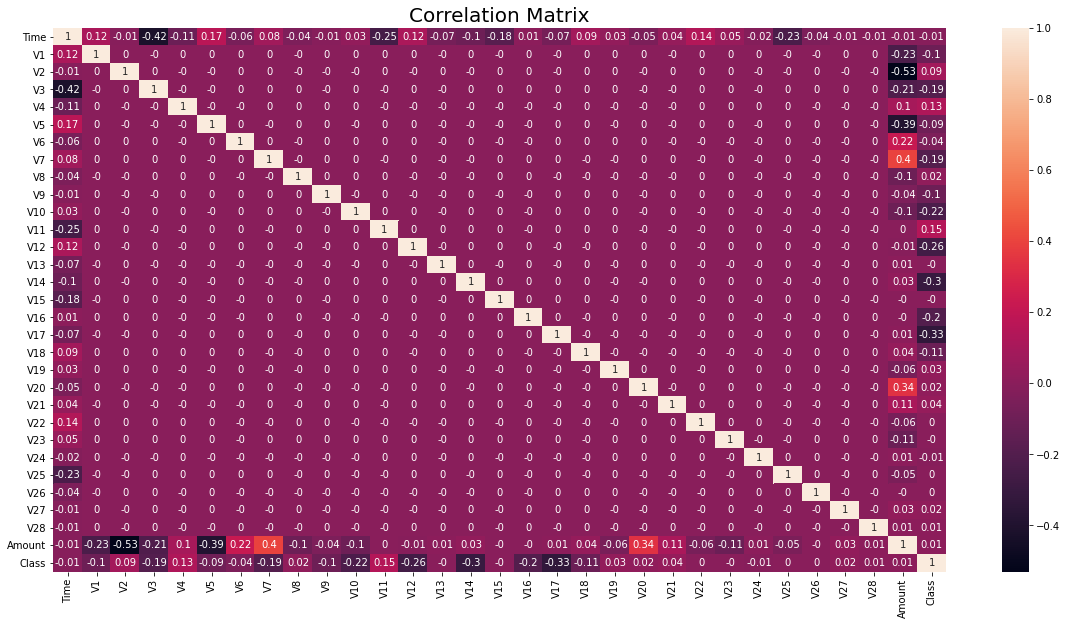

In [7]:
corr=df.corr()
plt.figure(figsize=(20,10))
plt.title("Correlation Matrix",fontsize=20)
sns.heatmap(round(corr,2),annot=True);

In [8]:
# splitting data fotr trainig and testing
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,ytest=train_test_split(df.loc[:, df.columns != 'Class'],df["Class"],test_size=0.2,random_state=0)

In [9]:
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier()

In [10]:
# training
rfc_model.fit(Xtrain,Ytrain)

RandomForestClassifier()

In [11]:
# predictions
pred=rfc_model.predict(Xtest)

In [12]:
# importing necessary metrics for evaluation of the model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,matthews_corrcoef

In [13]:
print("accuracy :",accuracy_score(ytest,pred))
print("Precision :",precision_score(ytest,pred))
print("Recall :",recall_score(ytest,pred))
print("f1_score :",f1_score(ytest,pred))
print("mathews_correlation :",matthews_corrcoef(ytest,pred))

accuracy : 0.9994908886626171
Precision : 0.9186046511627907
Recall : 0.7821782178217822
f1_score : 0.8449197860962566
mathews_correlation : 0.847406017294963


In [14]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.92      0.78      0.84       101

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



Text(0.5, 1.0, 'Confusion Matrix')

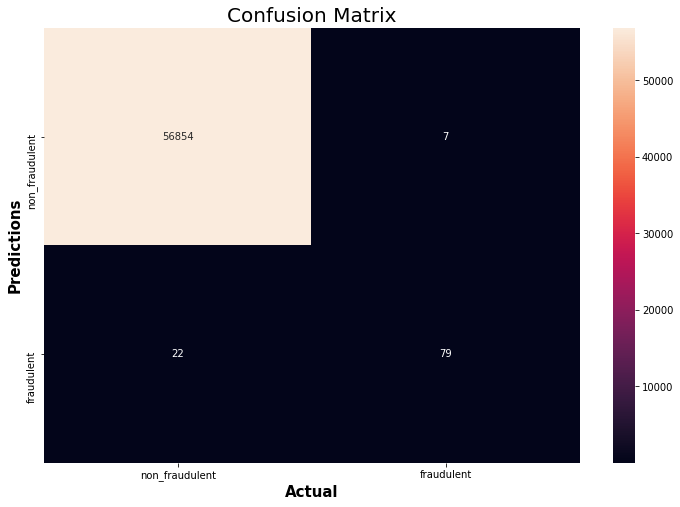

In [15]:
labels=["non_fraudulent","fraudulent"]
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(ytest,pred),xticklabels = labels, yticklabels = labels, annot = True,fmt="d")
plt.xlabel("Actual",weight = 'bold',fontsize=15)
plt.ylabel("Predictions",weight = 'bold',fontsize=15)
plt.title("Confusion Matrix",fontsize=20)

In [16]:
pd.DataFrame(ytest.value_counts())

,Class
0,56861
1,101


In [17]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier()

In [18]:
# training
gbc_model.fit(Xtrain,Ytrain)

GradientBoostingClassifier()

In [19]:
# predictions
pred=gbc_model.predict(Xtest)

In [20]:
print("accuracy :",accuracy_score(ytest,pred))
print("Precision :",precision_score(ytest,pred))
print("Recall :",recall_score(ytest,pred))
print("f1_score :",f1_score(ytest,pred))
print("mathews_correlation :",matthews_corrcoef(ytest,pred))

accuracy : 0.9991748885221726
Precision : 0.7934782608695652
Recall : 0.7227722772277227
f1_score : 0.7564766839378239
mathews_correlation : 0.756890518569283


In [21]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.79      0.72      0.76       101

    accuracy                           1.00     56962
   macro avg       0.90      0.86      0.88     56962
weighted avg       1.00      1.00      1.00     56962



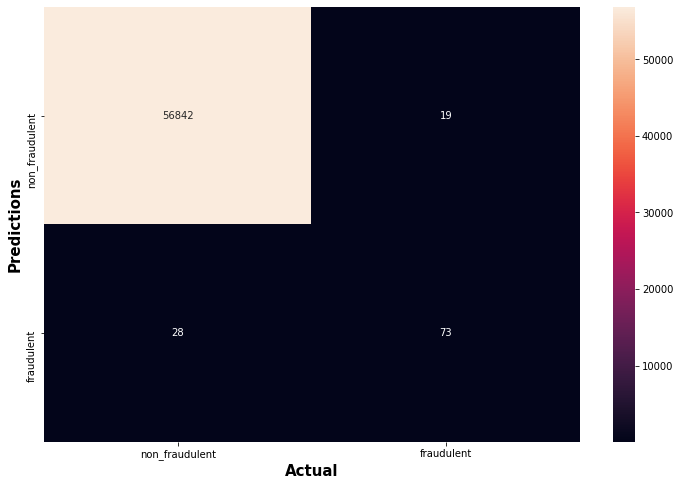

In [22]:
labels=["non_fraudulent","fraudulent"]
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(ytest,pred),xticklabels = labels, yticklabels = labels, annot = True,fmt="d")
plt.xlabel("Actual",weight = 'bold',fontsize=15)
plt.ylabel("Predictions",weight = 'bold',fontsize=15);

In [23]:
# Savving the model
import pickle
pickle.dump(rfc_model,open("RFC","wb"))

In [24]:
#load the model from the disk and use it fro predictions
load_model=pickle.load(open("RFC","rb"))

a=Xtest.iloc[0:4]
if a.ndim==1:
    a=a[np.newaxis,:]
    
load_model.predict(a)

array([0, 0, 0, 0], dtype=int64)